# Visualizing Principal Components Analysis

In this chapter we will explore some visualizations of principal components analysis applied to weekly PNL data from an options trading backtest applied to various underlyings.  This is the same data set we analyzed in the K-means Clustering chapter.

## Importing Packages

Let's begin by importing the packages that we will need.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Reading-In Data

Next, let's read-in the data that we will analyze.  This data consists of weekly PNLs of an options trading strategy that is applied to various underlyings.

In [ ]:
df_strategy = pd.read_csv('strategy_pca.csv')
df_strategy

,trade_date,DIA,EEM,EFA,EWJ,EWW,EWZ,FXE,FXI,FXY,...,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,XRT
0,2010-06-11,0.007174,-0.017362,-0.010725,-0.026382,-0.025379,-0.013350,-0.002375,-0.009553,-0.003428,...,-0.023686,-0.024645,-0.019757,-0.012389,-0.008406,-0.012576,-0.020438,-0.032221,-0.051404,-0.019148
1,2010-06-14,0.010173,0.035633,0.014950,0.014282,0.033116,0.033594,-0.000735,0.019362,0.005734,...,0.003849,0.044187,0.049763,0.015300,0.011585,0.019370,0.040846,0.060549,0.047449,0.030016
2,2010-06-15,-0.002297,-0.013010,-0.019534,-0.005922,0.000404,-0.004744,-0.001553,-0.000144,0.002334,...,-0.000972,-0.010887,-0.027390,0.010241,0.006655,0.014511,-0.014392,0.037345,0.016062,0.032434
3,2010-06-16,0.010865,0.023527,0.020398,0.009137,0.016342,0.032344,0.003108,0.027393,0.004025,...,0.024156,0.021204,0.016975,-0.000245,-0.002232,0.006271,0.030290,0.024339,0.040401,-0.004622
4,2010-06-17,0.007654,0.021416,0.013009,0.019784,0.012869,0.020282,0.002741,0.005559,0.003677,...,0.029602,-0.001968,-0.006714,0.003149,0.011234,-0.000091,0.004604,0.027596,0.021323,0.030434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2018-12-21,-0.010358,-0.008775,-0.025460,-0.058596,-0.009828,0.004381,-0.002566,0.011680,-0.001237,...,-0.052536,-0.026648,-0.070161,-0.017729,0.102341,-0.017573,-0.008129,-0.101895,0.012906,-0.089217
750,2018-12-24,-0.037064,0.004238,-0.017792,-0.007173,0.021813,0.007675,-0.000743,0.002134,-0.006349,...,0.000666,-0.027368,-0.101256,-0.080759,-0.141095,-0.043487,-0.168685,0.164792,-0.190494,-0.006617
751,2018-12-26,-0.074702,0.023863,0.015465,0.014819,0.047261,0.035732,0.000935,0.021011,0.001450,...,-0.033270,-0.105362,-0.053457,-0.002229,0.016203,-0.033066,-0.079741,-0.138356,-0.422292,-0.074324
752,2018-12-27,0.015387,0.016627,0.013537,0.013345,0.028583,0.016973,-0.002762,0.007095,0.001280,...,0.025021,0.013005,0.033152,0.012723,0.011532,0.012957,0.020950,0.073538,0.067077,0.016728


## Fitting PCA

We are now ready to fit a PCA to this PNL data; let's start by scaling.

In [ ]:
from sklearn.preprocessing import scale
Xs = scale(df_strategy.loc[:, df_strategy.columns != 'trade_date'])
Xs

array([[ 0.55349196, -0.7868123 , -0.40985713, ..., -0.53168657,
        -1.11237419, -1.01039618],
       [ 0.77882186,  1.61951344,  0.71837458, ...,  1.2393787 ,
         1.01447345,  1.72395022],
       [-0.15822341, -0.58920351, -0.796928  , ...,  0.79640469,
         0.33917233,  1.85846243],
       ...,
       [-5.59881083,  1.08506556,  0.74096939, ..., -2.55791817,
        -9.09217992, -4.07915548],
       [ 1.17060449,  0.75653352,  0.65627559, ...,  1.48735182,
         1.43678679,  0.98492788],
       [ 1.93360316,  0.50215785,  0.40666156, ...,  0.55234503,
         1.26664176,  1.81448399]])

Next we'll fit the first five principal components.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(Xs)

PCA(n_components=5)

--- 

**Code Challenge:** What is the percent of variance explained of the first principal component?

In [ ]:
#| code-fold: true
#| code-summary: "Solution"
pca.explained_variance_ratio_

array([0.40549205, 0.07136019, 0.04928076, 0.04223706, 0.03744758])

--- 

## Visualizing Loading Vectors

Next, we will visualize the loading vectors.  In order to do this, let's begin by creating a `DataFrame` to hold them.

In [ ]:
df_components = \
    pd.DataFrame({
        'underlying':df_strategy.drop(columns=['trade_date']).columns,
        'PCA1':-pca.components_[0],
        'PCA2':-pca.components_[1],
        'PCA3':-pca.components_[2],
        'PCA4':-pca.components_[3],
        'PCA5':-pca.components_[4],
    })
df_components.head()

,underlying,PCA1,PCA2,PCA3,PCA4,PCA5
0,DIA,0.239596,-0.169226,0.090560,0.015176,0.005542
1,EEM,0.222856,0.125537,-0.084749,0.123141,-0.089064
2,EFA,0.204699,0.084143,-0.030489,0.260802,-0.137933
3,EWJ,0.141398,0.016348,-0.005798,0.202220,0.008194
4,EWW,0.146514,0.136649,-0.138207,0.125954,-0.217323


Let's also add in the grouping from the cluster analysis we performed in the previous tutorial.  We being by reading in a CSV that contains the grouping.

In [ ]:
df_cluster = pd.read_csv('cluster_analysis.csv')
df_cluster.head()

,underlying,stdev,spy_stdev,corr_spy,beta,pnl,group,name
0,EEM,0.025753,0.014772,0.550046,0.958898,0.457594,0,ISHARES TR MSCI EMG MKT ETF
1,EWZ,0.045733,0.014772,0.388278,1.202046,4.057360,0,ISHARES INC MSCI BRAZIL ETF
2,FXI,0.030682,0.014772,0.433179,0.899703,1.700224,0,ISHARES TR CHINA LG-CAP ETF
3,IWM,0.019681,0.014772,0.756170,1.007407,2.827085,0,ISHARES TR RUSSELL 2000 ETF
4,QQQ,0.016196,0.014772,0.737255,0.808304,1.240073,0,INVESCO QQQ TR UNIT SER 1


Now we can join in the groupings to `df_components`.

In [ ]:
df_components = \
    (
    df_components
        .merge(df_cluster[['underlying','group']], how='inner', on='underlying')
    )
df_components.head()

,underlying,PCA1,PCA2,PCA3,PCA4,PCA5,group
0,DIA,0.239596,-0.169226,0.090560,0.015176,0.005542,1
1,EEM,0.222856,0.125537,-0.084749,0.123141,-0.089064,0
2,EFA,0.204699,0.084143,-0.030489,0.260802,-0.137933,2
3,EWJ,0.141398,0.016348,-0.005798,0.202220,0.008194,2
4,EWW,0.146514,0.136649,-0.138207,0.125954,-0.217323,2


And finally we can use **seaborn** to visualize the first component.

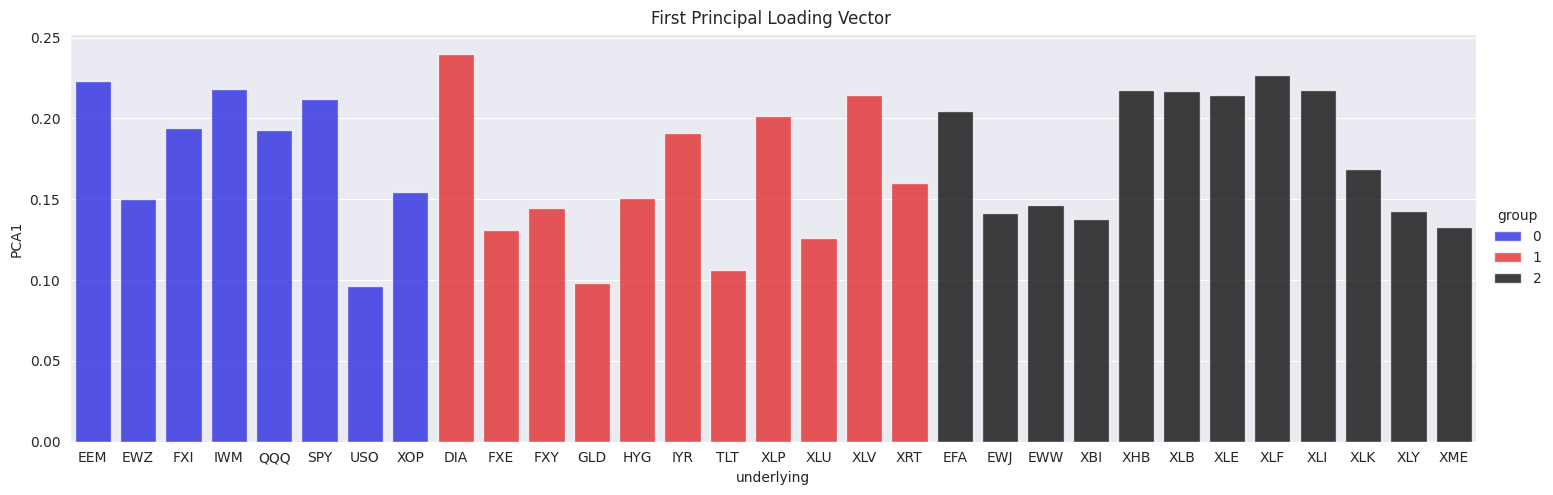

In [ ]:
with sns.axes_style('darkgrid'):
    g = sns.catplot(
        x='underlying',
        y='PCA1',
        kind='bar',
        color='black',
        alpha=0.75,
        height=5,
        aspect = 3,
        data=df_components.sort_values(['group', 'underlying']),
        hue='group',
        palette=["b", "r", 'k', 'y'],
        dodge=False,
    );
    plt.subplots_adjust(top=0.93);
    g.fig.suptitle('First Principal Loading Vector');

---

**Discussion Question:** Give an interpretation of the first principal component.

In [ ]:
#| code-fold: true
#| code-summary: "Solution"
# all underlyings tend to make/lose money together.

---

**Code Challenge:** Graph the other principal components.  Do you see any interesting patterns?

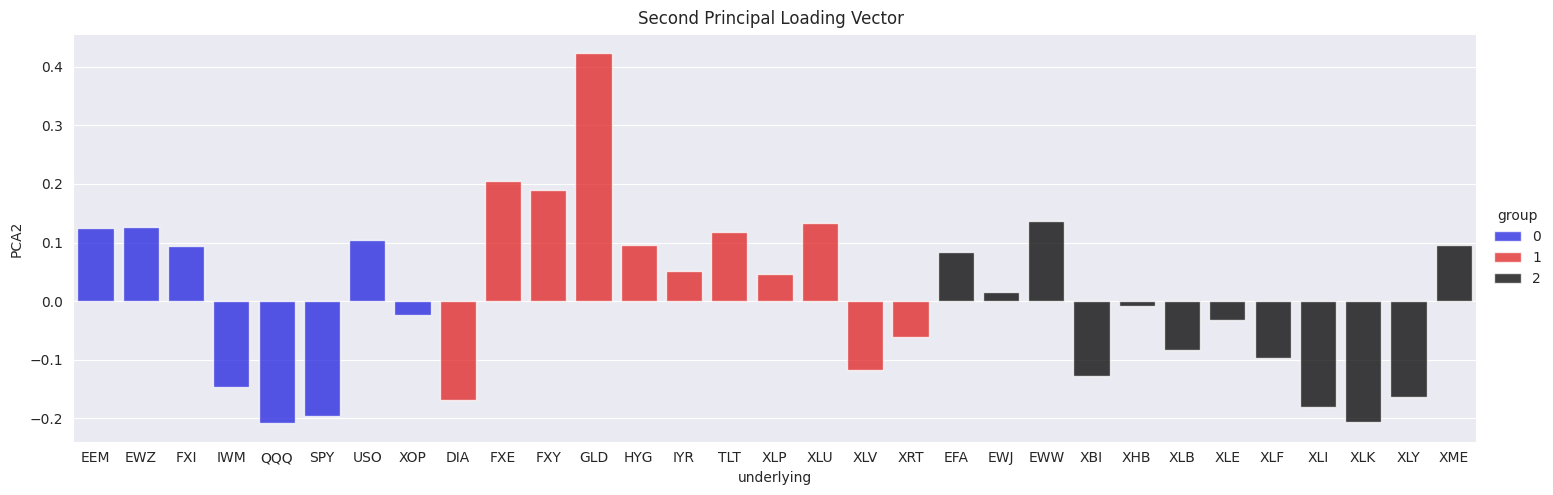

In [ ]:
#| code-fold: true
#| code-summary: "Solution"
# just change the graph above to point to the different components by altering the y arguement.
with sns.axes_style('darkgrid'):
    g = sns.catplot(
        x='underlying',
        y='PCA2',
        kind='bar',
        color='black',
        alpha=0.75,
        height=5,
        aspect = 3,
        data=df_components.sort_values(['group', 'underlying']),
        hue='group',
        palette=["b", "r", 'k', 'y'],
        dodge=False,
    );
    plt.subplots_adjust(top=0.93);
    g.fig.suptitle('Second Principal Loading Vector');

--- 

## Visualizing Scatter Plots of the Scores

Let's now graph the scores of the principal components.  We can access these with the `.transform` attribute.

In [ ]:
transform = pca.transform(Xs)
transform

array([[ 3.89770162,  1.05257476, -0.89223461, -0.35589021, -0.35466412],
       [-6.57546892, -0.40130749, -0.62645217,  1.17417457, -0.0447888 ],
       [-1.24527477, -0.22133038, -0.47610851,  1.01747872, -0.95672622],
       ...,
       [11.11022384, -8.76996808, -2.62431904, -8.75691498,  2.29959156],
       [-4.13229712,  0.8258197 ,  0.22816105,  0.82739011, -0.21214192],
       [-6.48726319,  1.57657387,  0.08028833,  1.82019844, -0.81119418]])

Finally, we construct a `DataFrame` with the scores and create a **seaborn** pair-plot.

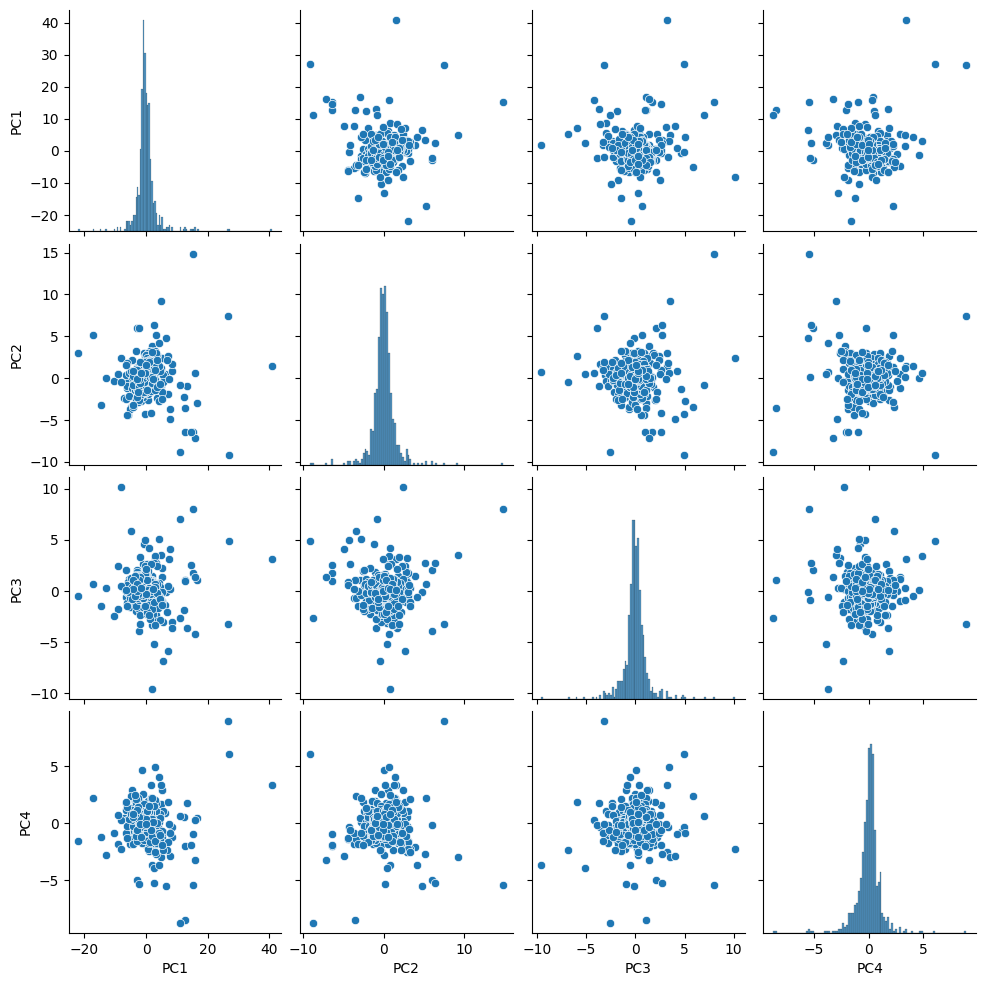

In [ ]:
df = \
    pd.DataFrame({
        'PC1':transform[:,0],
        'PC2':transform[:,1],
        'PC3':transform[:,2],
        'PC4':transform[:,3],
    })

sns.pairplot(df);

---

**Discussion Question:** Are you able to extract any insights from these plots?

In [ ]:
#| code-fold: true
#| code-summary: "Solution"
# I can see that the variance of the first principal scores is much higher than the others.

---